In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from zmq.utils.strtypes import unicode

data=pd.read_csv('social media influencers - instagram.csv')

In [2]:
df=pd.DataFrame(data)

In [3]:
print(df[df.isnull()])

    Influencer insta name instagram name category_1 category_2 Followers  \
0                     NaN            NaN        NaN        NaN       NaN   
1                     NaN            NaN        NaN        NaN       NaN   
2                     NaN            NaN        NaN        NaN       NaN   
3                     NaN            NaN        NaN        NaN       NaN   
4                     NaN            NaN        NaN        NaN       NaN   
..                    ...            ...        ...        ...       ...   
995                   NaN            NaN        NaN        NaN       NaN   
996                   NaN            NaN        NaN        NaN       NaN   
997                   NaN            NaN        NaN        NaN       NaN   
998                   NaN            NaN        NaN        NaN       NaN   
999                   NaN            NaN        NaN        NaN       NaN   

    Audience country(mostly) Authentic engagement\r\n Engagement avg\r\n  
0           

In [4]:
import numpy as np
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')


In [5]:
df.isnull()
df.isnull().sum()

Influencer insta name         0
instagram name               21
category_1                  108
category_2                  713
Followers                     0
Audience country(mostly)     14
Authentic engagement\r\n      0
Engagement avg\r\n            0
dtype: int64

In [6]:
def convert_views(views):
    if 'K' in views:
        return float(views.replace('K', '')) * 1_000
    elif 'M' in views:
        return float(views.replace('M', '')) * 1_000_000
    else:
        return float(views)

In [7]:
unique_v=df['category_1'].unique()
print(unique_v)

['Sports with a ball' 'Music' 'Shows' 'Lifestyle' nan
 'Humor & Fun & Happiness' 'Cinema & Actors/actresses' 'Beauty'
 'Clothing & Outfits' 'Fashion' 'Modeling' 'Food & Cooking' 'Family'
 'Fitness & Gym' 'Computers & Gadgets' 'Art/Artists' 'Finance & Economics'
 'Cars & Motorbikes' 'Photography' 'Racing Sports'
 'Literature & Journalism' 'Business & Careers' 'Animals'
 'Nature & landscapes' 'Adult content' 'Accessories & Jewellery'
 'Education' 'Management & Marketing' 'Luxury' 'Science'
 'Machinery & Technologies' 'Kids & Toys']


In [8]:
def convert_values(x,unique_v):
    count=0
    i=0
    for j in unique_v:
        count=count+1
    if x is not np.nan:
        while i<len(x):
            j=0
            while j<count:
                if x[i]==unique_v[j]:
                    x[i]=j+1
                j=j+1
            i=i+1
    return x
unique_v2=df['category_2'].unique()
df['category_1']=convert_values(df['category_1'].tolist(),unique_v)
df['category_2']=convert_values(df['category_2'].tolist(),unique_v2)
print(df['category_1'])

0      1.0
1      2.0
2      3.0
3      4.0
4      NaN
      ... 
995    7.0
996    1.0
997    2.0
998    7.0
999    4.0
Name: category_1, Length: 1000, dtype: float64


In [9]:
# Instantiate the imputer with your chosen strategy, e.g., 'mean'
imputer = SimpleImputer(strategy='mean')

# Assuming you want to impute missing values for numerical columns, select them
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Fit the imputer and transform the selected column 'category_1'
df['category_1'] = imputer.fit_transform(df[['category_1']])
df['category_2'] = imputer.fit_transform(df[['category_2']])
# Check if there are any missing values left
print(df.isnull().sum())


Influencer insta name        0
instagram name              21
category_1                   0
category_2                   0
Followers                    0
Audience country(mostly)    14
Authentic engagement\r\n     0
Engagement avg\r\n           0
dtype: int64


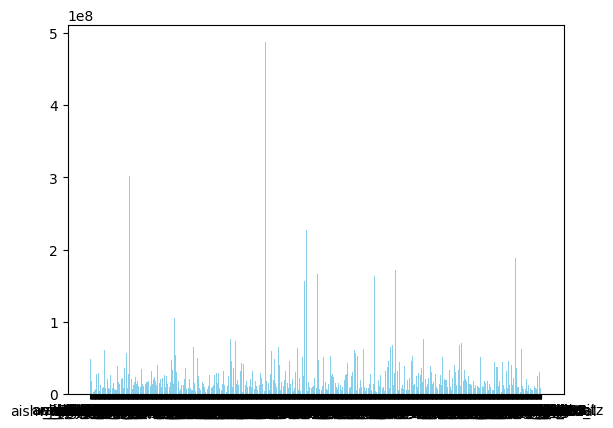

In [17]:
from matplotlib import pyplot as plt
followers=df['Followers'].apply(convert_views)
plt.bar(df['Influencer insta name'],followers, color='skyblue')
plt.show()